Validations sur le réseau ferré : Nombre de validations par jour (1er semestre 2019) Dataset

In [20]:
import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv('C:/Users/lol/Desktop/test/validations.csv', sep=';')   

In [22]:
df.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2019-01-08,810,802,744,AEROPORT CHARLES DE GAULLE 2-TGV,73699.0,IMAGINE R,532
1,2019-05-01,100,110,547,MIRABEAU,71162.0,IMAGINE R,273
2,2019-01-08,810,802,77,BLANC-MESNIL,72648.0,FGT,308
3,2019-05-01,100,110,547,MIRABEAU,71162.0,NAVIGO,992
4,2019-01-08,810,802,77,BLANC-MESNIL,72648.0,NAVIGO JOUR,Moins de 5


In [23]:
#add a new column Int_NB_VALD that contains converted NB_VALD values to integers
df['Int_NB_VALD']=df['NB_VALD'].str.replace('\D+','').astype(int)

In [24]:
#get top 20 stations in terms of validations
top_validations=df.nlargest(20, 'Int_NB_VALD')
top_validations

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD,Int_NB_VALD
26085,2019-06-11,810,801,306,GARE DE LYON,73626.0,NAVIGO,130809,130809
220676,2019-06-27,810,801,306,GARE DE LYON,73626.0,NAVIGO,129274,129274
63536,2019-06-13,810,801,306,GARE DE LYON,73626.0,NAVIGO,129047,129047
52239,2019-06-06,810,801,306,GARE DE LYON,73626.0,NAVIGO,128860,128860
806581,2019-04-16,810,801,306,GARE DE LYON,73626.0,NAVIGO,128620,128620
738265,2019-04-02,810,801,306,GARE DE LYON,73626.0,NAVIGO,128133,128133
304055,2019-05-21,810,801,306,GARE DE LYON,73626.0,NAVIGO,128071,128071
423394,2019-04-11,810,801,306,GARE DE LYON,73626.0,NAVIGO,127981,127981
396549,2019-02-14,810,801,306,GARE DE LYON,73626.0,NAVIGO,127569,127569
287672,2019-02-14,810,801,393,LA DEFENSE-GRANDE ARCHE,71517.0,NAVIGO,127535,127535


Text(0, 0.5, 'Number of validations')

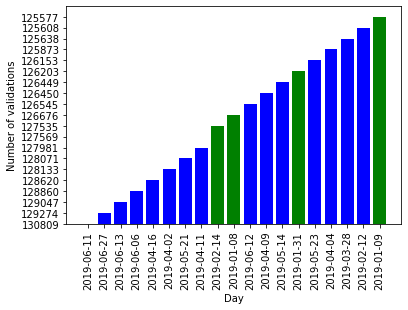

In [25]:
ax=plt.bar(top_validations['JOUR'], top_validations['NB_VALD'],orientation='vertical',
        color=top_validations['LIBELLE_ARRET'].map({'GARE DE LYON': 'b', 'LA DEFENSE-GRANDE ARCHE': 'g'}))
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of validations')

In [50]:
# Sort 'LIBELLE_ARRET' by nb of validations
df.groupby(['LIBELLE_ARRET','CATEGORIE_TITRE'], sort=True)['Int_NB_VALD'].agg('sum')

LIBELLE_ARRET                CATEGORIE_TITRE
ABBESSES                     ?                    3545
                             AMETHYSTE           17217
                             AUTRE TITRE          1021
                             FGT                 14654
                             IMAGINE R          103101
                             NAVIGO             451248
                             NAVIGO JOUR          1295
                             NON DEFINI            983
                             TST                 14108
ABLON                        ?                     582
                             AMETHYSTE            5877
                             AUTRE TITRE            15
                             FGT                  8283
                             IMAGINE R           44813
                             NAVIGO             162895
                             NAVIGO JOUR           300
                             TST                 10275
ACHERES-GRAND-CORMIE

numbre 'NB_VALD' in station "OLYMPIADES" from :24-06-2019 to 30-06-2019

In [54]:
#first set 'JOUR' column to datetime type then compute sum of 'NB_VALD'
df['JOUR'] = pd.to_datetime(df['JOUR'])  
df[(df['JOUR'] >= '2019-6-24') & (df['JOUR'] <= '2019-6-30') & (df['LIBELLE_ARRET']=='OLYMPIADES') ]['Int_NB_VALD'].sum()

120935

numbre 'NB_VALD' in station "M. MONTROUGE" from :24-06-2019 to 30-06-2019

In [55]:
df[(df['JOUR'] >= '2019-6-24') & (df['JOUR'] <= '2019-6-30') & (df['LIBELLE_ARRET']=='M. MONTROUGE') ]['Int_NB_VALD'].sum()

119194